In [286]:
# Import Libraries 
from plantcv import plantcv as pcv
import matplotlib

In [287]:
def saveListToFile(listname, pathtosave):
    file1 = open(pathtosave,"w") 
    for i in listname:
        file1.writelines("{}\n".format(i))    
    file1.close() 

In [288]:
%matplotlib inline
# import os
# import sys
# sys.path.append('/home/user/plantcv')
import numpy as np
import cv2
from matplotlib import pyplot as plt
from plantcv import plantcv as pcv

# Set variables
pcv.params.debug = 'plot'                     # Plot debug images to the notebook
img_file = '/mnt/f/proj_5551/thumbnail_Exp 14.jpg' 

In [289]:
import glob
print(glob.glob("./proj_5551/*"))

['./proj_5551/bamboo.png', './proj_5551/download.png', './proj_5551/download2.png', './proj_5551/images.jpg', './proj_5551/mask.png', './proj_5551/masked.png', './proj_5551/masked3.png', './proj_5551/masked4.png', './proj_5551/masked5.png', './proj_5551/masked6.png', './proj_5551/morphology_tutorial_results.txt', './proj_5551/sample1.png', './proj_5551/Screen Shot 2022-04-05 at 3.18.37 pm.png', './proj_5551/Screen Shot 2022-05-13 at 4.13.34 pm.png', './proj_5551/thumbnail_Exp 14.jpg', './proj_5551/thumbnail_Exp 15.jpg', './proj_5551/thumbnail_Exp11-1.jpg', './proj_5551/thumbnail_Exp11-2.jpg', './proj_5551/thumbnail_EXp13.jpg']


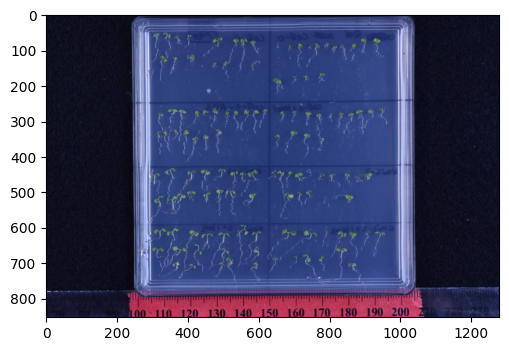

In [290]:
img, path, filename = pcv.readimage(filename=img_file)

In [291]:

# Crop the mask 
# cropped_mask = img[660:310, 760:370]
# cropped_mask = img[75:175, 0:200]
#  img[660:310, 760:370]

In [292]:
# Convert RGB to HSV and extract the saturation channel

# Inputs:
#   rgb_image - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
# s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

In [293]:
# Take a binary threshold to separate plant from background. 
# Threshold can be on either light or dark objects in the image. 

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than 
#                 the background then standard threshold is done. If the object 
#                 is darker than the background then inverse thresholding is done. 
# s_thresh = pcv.threshold.binary(gray_img=s, threshold=150, max_value=50, object_type='light')

In [294]:
# Median Blur to clean noise 

# Inputs: 
#   gray_img - Grayscale image data 
#   ksize - Kernel size (integer or tuple), (ksize, ksize) box if integer input,
#           (n, m) box if tuple input 
# s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=1)

In [295]:
# An alternative to using median_blur is gaussian_blur, which applies 
# a gaussian blur filter to the image. Depending on the image, one 
# technique may be more effective than others. 

# Inputs:
#   img - RGB or grayscale image data
#   ksize - Tuple of kernel size
#   sigma_x - Standard deviation in X direction; if 0 (default), 
#            calculated from kernel size
#   sigma_y - Standard deviation in Y direction; if sigmaY is 
#            None (default), sigmaY is taken to equal sigmaX
# gaussian_img = pcv.gaussian_blur(img=s_thresh, ksize=(5, 5), sigma_x=0, sigma_y=None)

In [296]:
# Convert RGB to LAB and extract the blue channel ('b')

# Input:
#   rgb_img - RGB image data 
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
# b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue channel image 
# b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
#                                 object_type='light')

In [297]:
# Join the threshold saturation and blue-yellow images with a logical or operation 

# Inputs: 
#   bin_img1 - Binary image data to be compared to bin_img2
#   bin_img2 - Binary image data to be compared to bin_img1
# bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

In [298]:
# Appy Mask (for VIS images, mask_color='white')

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
# masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

In [299]:
# pwd

In [300]:

# saveListToFile(masked,'/mnt/f/proj_5551/masked.png' )
# matplotlib.image.imsave('/mnt/f/proj_5551/masked.png', bs)

In [301]:
# img, path, filename = pcv.readimage(filename='/mnt/f/proj_5551/masked.png')


In [302]:
# filename

In [303]:
# Crop the mask 
# cropped_mask = img[400:500, 400:600]

In [304]:
# Skeletonize the mask 
# %matplotlib notebook
# To enable the zoom feature to better see fine lines, uncomment the line above ^^ 

# Inputs:
#   mask = Binary image data
# skeleton = pcv.morphology.skeletonize(mask=cropped_mask) # cropped_mask)

In [305]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels

# masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
# masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

In [306]:
# Threshold the green-magenta and blue images

# maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
#                                       max_value=255, object_type='dark')
# maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
#                                        max_value=255, object_type='light')
# maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
#                                       max_value=255, object_type='light')

In [307]:
# Join the thresholded saturation and blue-yellow images (OR)

# ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
# ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

In [308]:
# Opening filters out bright noise from an image.

# Inputs:
#   gray_img - Grayscale or binary image data
#   kernel - Optional neighborhood, expressed as an array of 1's and 0's. If None (default),
#   uses cross-shaped structuring element.
# opened_ab = pcv.opening(gray_img=ab)

In [309]:
# Depending on the situation it might be useful to use the 
# exclusive or (pcv.logical_xor) function. 

# Inputs: 
#   bin_img1 - Binary image data to be compared to bin_img2
#   bin_img2 - Binary image data to be compared to bin_img1
# xor_img = pcv.logical_xor(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)

In [310]:
# Fill small objects (reduce image noise) 

# Inputs: 
#   bin_img - Binary image data 
#   size - Minimum object area size in pixels (must be an integer), and smaller objects will be filled
# ab_fill = pcv.fill(bin_img=ab, size=200)

In [311]:
# Closing filters out dark noise from an image.

# Inputs:
#   gray_img - Grayscale or binary image data
#   kernel - Optional neighborhood, expressed as an array of 1's and 0's. If None (default),
#   uses cross-shaped structuring element.
# closed_ab = pcv.closing(gray_img=ab_fill)

In [312]:
# Apply mask (for VIS images, mask_color=white)
# masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')

In [313]:
# img, path, filename = pcv.readimage(masked2)

In [314]:
# Identify objects

# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
# id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)

In [315]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
# roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=660, y=310, h=100, w=60)

In [316]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
# #                     'largest' (keep only largest contour)
# roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
#                                                                roi_hierarchy=roi_hierarchy, 
#                                                                object_contour=id_objects, 
#                                                                obj_hierarchy=obj_hierarchy,
#                                                                roi_type='partial')

In [317]:
# Object combine kept objects

# Inputs:
#   img - RGB or grayscale image data for plotting 
#   contours - Contour list 
#   hierarchy - Contour hierarchy array 
# obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

In [318]:
# mask.dtype

In [319]:
# # matplotlib.image.imsave('/mnt/f/proj_5551/masked.png', mask)
# import cv2
# import numpy as np

# # img = ... # Your image as a numpy array 

# cv2.imwrite("/mnt/f/proj_5551/masked.png", mask)

In [320]:

# Read image (sometimes you need to run this line twice to see the image) 

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
# masked_img, path, filename = pcv.readimage(filename='/mnt/f/proj_5551/mask.png')



In [321]:
# Crop the mask 
# cropped_mask = masked_img[1150:1750, 900:1550]

In [322]:
# Skeletonize the mask 
#%matplotlib notebook
# To enable the zoom feature to better see fine lines, uncomment the line above ^^ 

# Inputs:
#   mask = Binary image data
# skeleton = pcv.morphology.skeletonize(mask=cropped_mask)

In [323]:
# Prune the skeleton  
# Generally, skeletonized images will have barbs (this image is particularly ideal, 
# that's why it's the example image in the tutorial!), 
# representing the width, that need to get pruned off. 

# Inputs:
#   skel_img = Skeletonized image
#   size     = Size to get pruned off each branch
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
# img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=10, mask=cropped_mask)


In [324]:
# Fill in segments (also stores out area data)  

# Inputs:
# mask         = Binary image, single channel, object = 1 and background = 0
# objects      = List of contours
# label        = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects, label="default")


In [325]:
# Identify branch points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=skeleton, mask=cropped_mask, label="default")


In [326]:
# Identify tip points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug 
#              image will be overlaid on the mask
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# tip_pts_mask = pcv.morphology.find_tips(skel_img=skeleton, mask=None, label="default")


In [327]:
# Adjust line thickness with the global line thickness parameter (default = 5),
# and provide binary mask of the plant for debugging. NOTE: the objects and
# hierarchies returned will be exactly the same but the debugging image (segmented_img)
# will look different.
# pcv.params.line_thickness = 3 

In [328]:
# Sort segments into primary (stem) objects and secondary (leaf) objects. 
# Downstream steps can be performed on just one class of objects at a time, 
# or all objects (output from segment_skeleton) 
  
# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
# #   mask      = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
# leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, 
#                                                  objects=edge_objects,
#                                                  mask=cropped_mask)

In [329]:
# Identify segments     

# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, 
#               debug image will be overlaid on the mask.
# segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
#                                                        objects=leaf_obj,
#                                                        mask=cropped_mask)

In [330]:
# Similar to line thickness, there are optional text size and text thickness parameters 
# that can be adjusted to better suit images or varying sizes.
# pcv.params.text_size=.8 # (default text_size=.55)
# pcv.params.text_thickness=3 # (defaul text_thickness=2) 

# segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
#                                                        objects=leaf_obj,
#                                                        mask=cropped_mask)

In [331]:
# Measure path lengths of segments     

# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours
#   label           = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# labeled_img  = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
#                                                   objects=leaf_obj, label="default")

In [332]:
# Measure euclidean distance of segments      

# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
#                                                       objects=leaf_obj, label="default")


In [333]:
# Measure curvature of segments      

# Inputs:
#   segmented_img = Segmented image to plot curvature on
#   objects       = List of contours
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# labeled_img = pcv.morphology.segment_curvature(segmented_img=segmented_img, 
#                                                objects=leaf_obj, label="default")


In [334]:
# Measure the angle of segments      

# Inputs:
#   segmented_img = Segmented image to plot angles on
#   objects       = List of contours
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# labeled_img = pcv.morphology.segment_angle(segmented_img=segmented_img, 
#                                            objects=leaf_obj, label="default")

In [335]:
# Measure the tangent angles of segments      

# Inputs:
#   segmented_img = Segmented image to plot tangent angles on
#   objects       = List of contours
#   size          = Size of ends used to calculate "tangent" lines
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# labeled_img = pcv.morphology.segment_tangent_angle(segmented_img=segmented_img, 
#                                                    objects=leaf_obj, size=15, label="default")


In [336]:
# Measure the leaf insertion angles      

# Inputs:
#   skel_img         = Skeletonize image 
#   segmented_img    = Segmented image to plot insertion angles on
#   leaf_objects     = List of leaf contours
#   stem_objects     = List of stem objects 
#   size             = Size of the inner portion of each leaf to find a linear regression line
#   label            = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

# labeled_img = pcv.morphology.segment_insertion_angle(skel_img=skeleton,
#                                                      segmented_img=segmented_img, 
#                                                      leaf_objects=leaf_obj, 
#                                                      stem_objects=stem_obj,
#                                                      size=20, label="default")


In [337]:
# Write morphological data to results file

# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
# pcv.outputs.save_results(filename="/mnt/f/proj_5551/morphology_tutorial_results.txt")


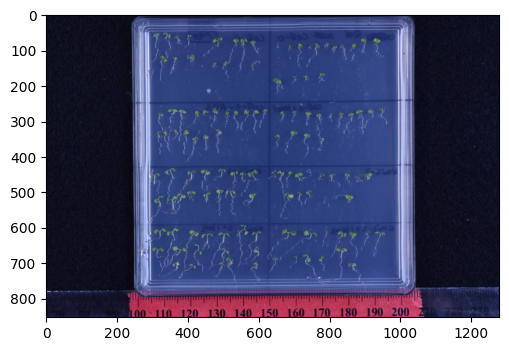

In [338]:
# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
# img_file = './proj_5551/thumbnail_Exp 14.jpg' 
img, path, filename = pcv.readimage(filename="./proj_5551/thumbnail_Exp 14.jpg")
# img, path, filename = pcv.readimage(filename="./proj_5551/thumbnail_Exp11-1.jpg"

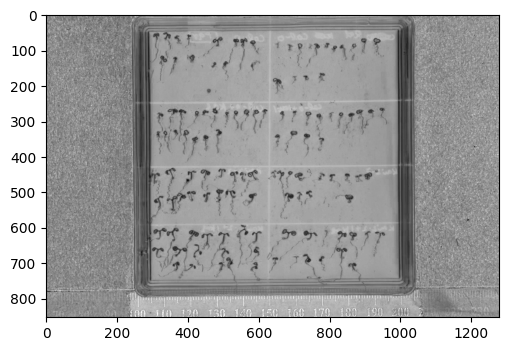

In [339]:
# Inputs:
#   rgb_img = original color image
#   channel = one of the colorspaces: 'h', 's', or 'v'
s = pcv.rgb2gray_hsv(rgb_img=img, channel="s")

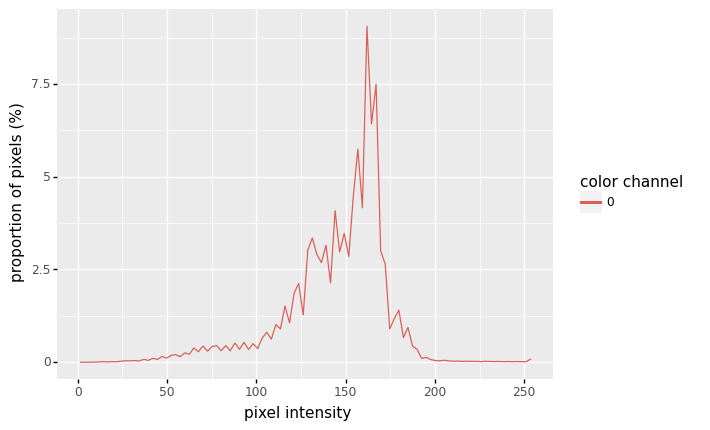

In [340]:
# Inputs:
#   img         = gray image in selected colorspace
#   mask        = None (default), or mask
#   bins        = 100 (default) or number of desired number of evenly spaced bins
#   lower-bound = None (default) or minimum value on x-axis
#   upper-bound = None (default) or maximum value on x-axis
#   title       = None (default) or custom plot title
#   hist_data   = False (default) or True (if frequency distribution data is desired)
hist = pcv.visualize.histogram(img=s)

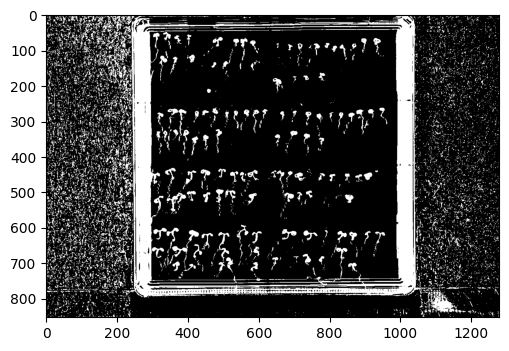

In [341]:
# Inputs:
#   gray_img    = Grayscale image data
#   threshold   = Threshold value (0-255)
#   max_value   = Value to apply above threshold (255 = white)
#   object_type = "light" or "dark" (default: "light"). If object is lighter than the background then standard 
#                 thresholding is done. If object is darker than the background then inverse thresholding is done.
s_bad = pcv.threshold.binary(gray_img=s, threshold=125, max_value=255, object_type='dark')

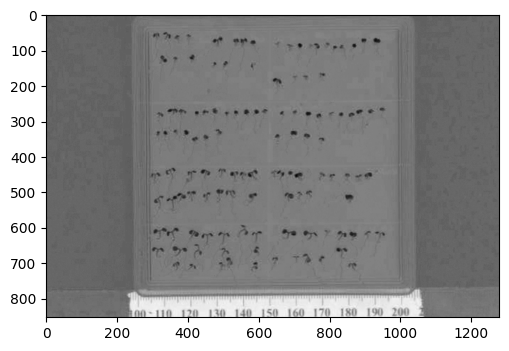

In [342]:
# Create second threshold
# Inputs:
#   rgb_img = original color image
#   channel = one of the colorspaces: 'l', 'a', or 'b'
a = pcv.rgb2gray_lab(rgb_img = img, channel='a')

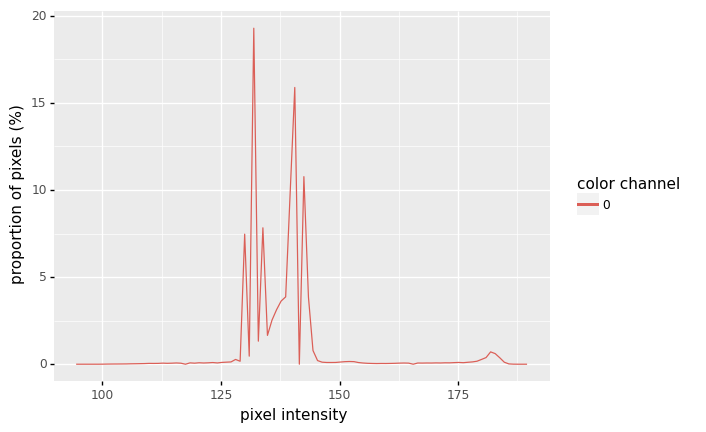

In [343]:
# Inputs:
#   img         = gray image in selected colorspace
#   mask        = None (default), or mask
#   bins        = 100 (default) or number of desired number of evenly spaced bins
#   lower-bound = None (default) or minimum value on x-axis
#   upper-bound = None (default) or maximum value on x-axis
#   title       = None (default) or custom plot title
#   hist_data   = False (default) or True (if frequency distribution data is desired)
hist2= pcv.visualize.histogram(img=a)

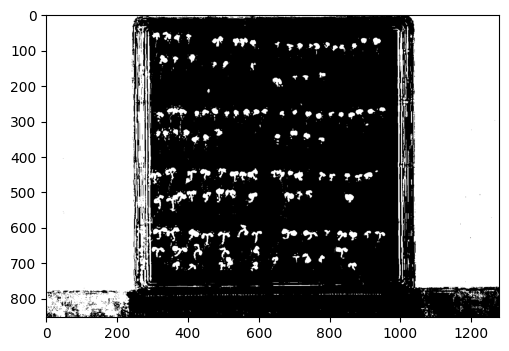

In [344]:
# Inputs:
#   gray_img    = Grayscale image data
#   threshold   = Threshold value (0-255)
#   max_value   = Value to apply above threshold (255 = white)
#   object_type = "light" or "dark" (default: "light"). If object is lighter than the background then standard 
#                 thresholding is done. If object is darker than the background then inverse thresholding is done.
a_thresh = pcv.threshold.binary(gray_img=a, threshold=136, max_value=255, object_type='dark')

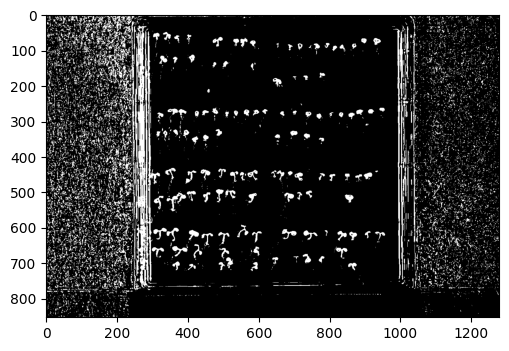

In [345]:
# Inputs:
#   bin_img1 = first binary mask
#   bin_img1 = second binary mask
mask = pcv.logical_and(bin_img1 = s_bad, bin_img2=a_thresh)

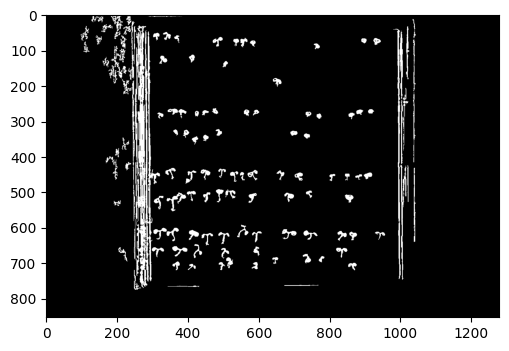

In [346]:
# Inputs:
#   bin_img = binary mask
#   size    = maximum size of white pixels to be filled in black
mask_fill = pcv.fill(bin_img = mask, size = 130)

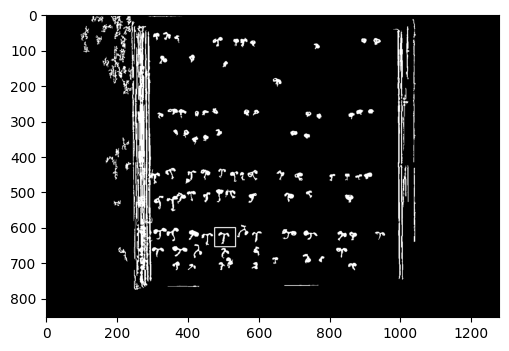

In [347]:
# Inputs:
#   img = binary mask
#   x = leftmost x position of desired area
#   y = topmost y position of desired area
#   h = height of desired area to be included in cropped image
#   w = width of desired area to be included in cropped image
cropped_mask = pcv.crop(img = mask_fill, x = 475, y = 600, h = 55, w = 60)
# cropped_mask = pcv.crop(img = mask_fill, x = 570, y = 90, h = 190, w = 120)
# cropped_mask = pcv.crop(img = mask_fill, x = 620, y = 390, h = 190, w = 115)


In [348]:
# cv2.imwrite("/mnt/f/proj_5551/masked3.png", cropped_mask)
# cv2.imwrite("/mnt/f/proj_5551/masked4.png", cropped_mask)
# cv2.imwrite("/mnt/f/proj_5551/masked5.png", cropped_mask)
cv2.imwrite("/mnt/f/proj_5551/masked6.png", cropped_mask)

True

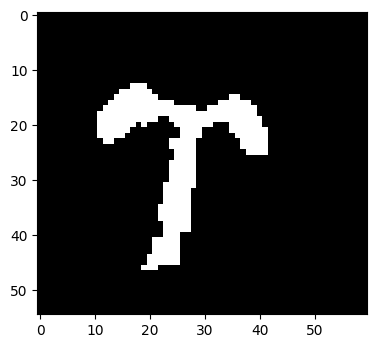

In [349]:
# Read image (sometimes you need to run this line twice to see the image) 

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
# img, path, filename = pcv.readimage(filename="/mnt/f/proj_5551/masked3.png")
# img, path, filename = pcv.readimage(filename="/mnt/f/proj_5551/masked4.png")
# img, path, filename = pcv.readimage(filename="/mnt/f/proj_5551/masked5.png")
img, path, filename = pcv.readimage(filename="/mnt/f/proj_5551/masked6.png")

# Crop the mask 
cropped_mask = img # [0:50, 30:50]

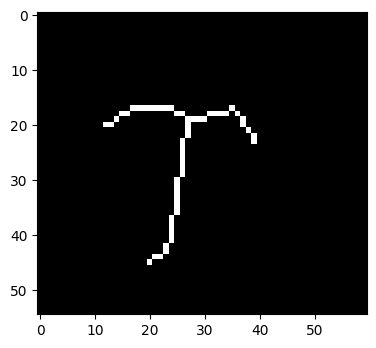

In [350]:
# Skeletonize the mask 
#%matplotlib notebook
# To enable the zoom feature to better see fine lines, uncomment the line above ^^ 

# Inputs:
#   mask = Binary image data
skeleton = pcv.morphology.skeletonize(mask=cropped_mask)

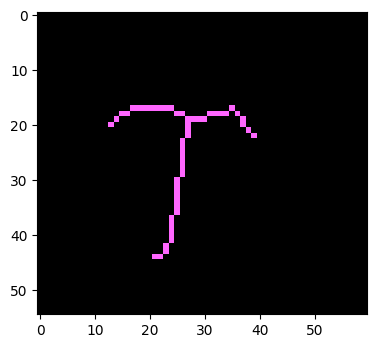

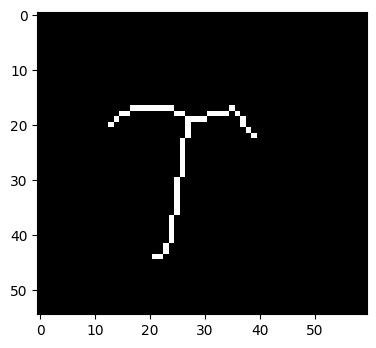

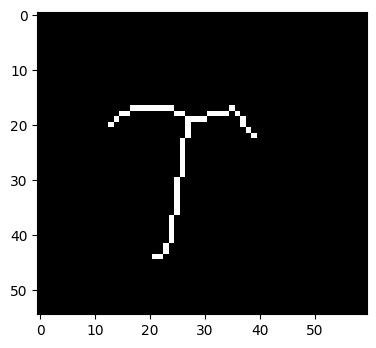

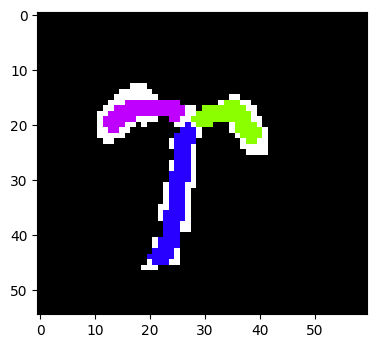

In [351]:
# Prune the skeleton  
# Generally, skeletonized images will have barbs (this image is particularly ideal, 
# that's why it's the example image in the tutorial!), 
# representing the width, that need to get pruned off. 

# Inputs:
#   skel_img = Skeletonized image
#   size     = Size to get pruned off each branch
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=10, mask=cropped_mask)

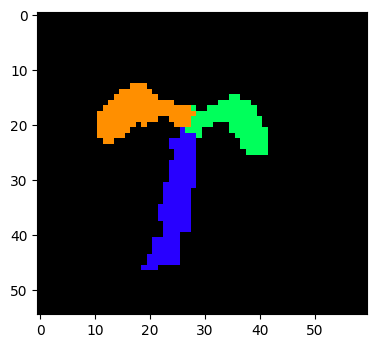

In [352]:
# Fill in segments (also stores out area data)  

# Inputs:
# mask         = Binary image, single channel, object = 1 and background = 0
# objects      = List of contours
# label        = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects, label="default")


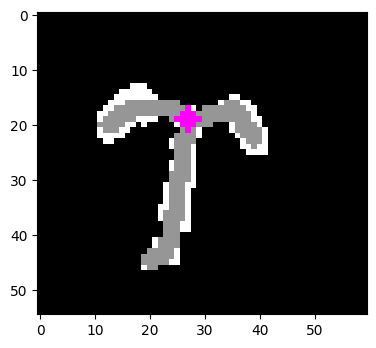

In [353]:
# Identify branch points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=skeleton, mask=cropped_mask, label="default")


In [354]:
# Adjust line thickness with the global line thickness parameter (default = 5),
# and provide binary mask of the plant for debugging. NOTE: the objects and
# hierarchies returned will be exactly the same but the debugging image (segmented_img)
# will look different.
pcv.params.line_thickness = 2 

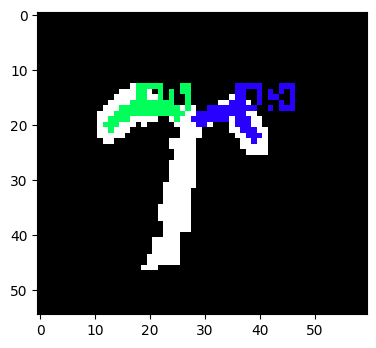

In [355]:
# Similar to line thickness, there are optional text size and text thickness parameters 
# that can be adjusted to better suit images or varying sizes.
pcv.params.text_size=.20 # (default text_size=.55)
pcv.params.text_thickness=1 # (defaul text_thickness=2) 

segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
                                                       objects=leaf_obj,
                                                       mask=cropped_mask)

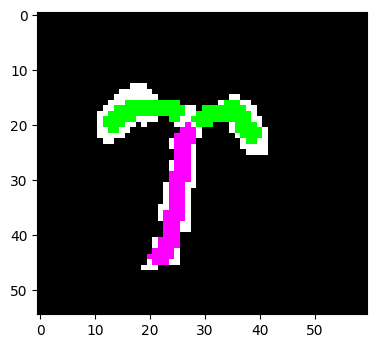

In [356]:
# Sort segments into primary (stem) objects and secondary (leaf) objects. 
# Downstream steps can be performed on just one class of objects at a time, 
# or all objects (output from segment_skeleton) 
  
# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, 
                                                 objects=edge_objects,
                                                 mask=cropped_mask)

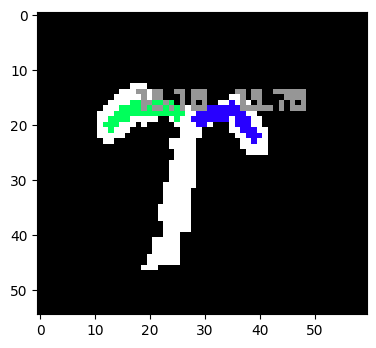

In [369]:
# Measure path lengths of segments     

# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours
#   label           = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img  = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
                                                  objects=leaf_obj, label="default")

In [368]:
# Similar to line thickness, there are optional text size and text thickness parameters 
# that can be adjusted to better suit images or varying sizes.
pcv.params.text_size=.15 # (default text_size=.55)
pcv.params.text_thickness=1 # (defaul text_thickness=2) 

# segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
#                                                        objects=leaf_obj,
#                                                        mask=cropped_mask)